### Preparing a dataset to apply CNN processing using Dataset Augmentation technique.

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train = "/content/drive/MyDrive/dsai/SEM 3/DL/practicals/assignment/iris/train"
test = "/content/drive/MyDrive/dsai/SEM 3/DL/practicals/assignment/iris/test"

In [3]:
# batch size = 3 i.e. 3 images at a time
batch_size = 3
img_size = (160,160)

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train, batch_size = batch_size, image_size = img_size)
test_dataset = tf.keras.utils.image_dataset_from_directory(test, batch_size = batch_size, image_size = img_size)

Found 9 files belonging to 3 classes.
Found 3 files belonging to 3 classes.


In [14]:
print("Training Dataset",train_dataset)

Training Dataset <_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
#create neural network of 2 layers
dataset_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"), tf.keras.layers.RandomRotation(0.2)])

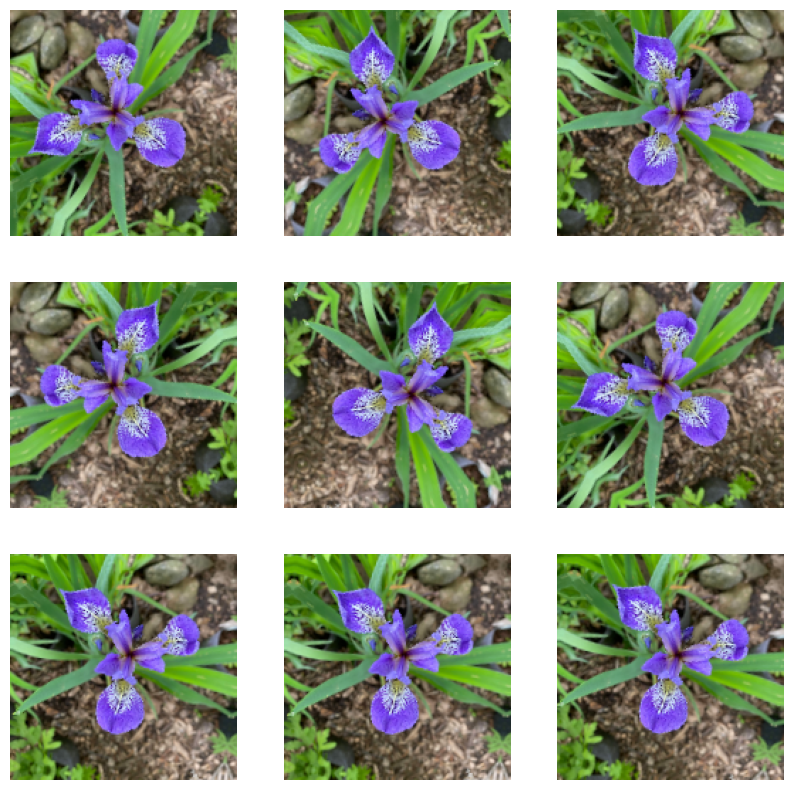

In [6]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10,10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3,3,i+1)

    augmented_image=dataset_augmentation(tf.expand_dims(first_image,0))
    plt.imshow(augmented_image[0]/255)
    plt.axis("off")

In [7]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model = keras.Sequential([
  # Add the preprocessing layers you created earlier.

  dataset_augmentation,
  # Add the model layers
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(3,activation='softmax')
])

In [9]:
#y_aug = to_categorical(augmented_image)

In [10]:
image_batch,label_batch = next(iter(train_dataset))

In [11]:
label_batch


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 1, 1], dtype=int32)>

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = 'accuracy')

In [13]:
y_aug = to_categorical(label_batch)
y_aug

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [15]:
model.fit(image_batch,y_aug,epochs = 2)

Epoch 1/2
1/1 [==============================] - 3s 3s/step - loss: 9.0952 - accuracy: 0.3333
Epoch 2/2
1/1 [==============================] - 0s 345ms/step - loss: 680.2779 - accuracy: 0.6667


In [16]:
model.predict(image_batch)

1/1 [==============================] - 1s 916ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [17]:
y_aug

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [19]:
image_batch1,label_batch1 = next(iter(test_dataset))

In [20]:
model.predict(image_batch1)

1/1 [==============================] - 0s 44ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [21]:
y_aug

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)